Importing Libraries

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)


Defining path and importing data set

In [256]:
file = ('C:/Users/YasinHammad(Ascend)/Desktop/Machine learning task/archive/heart.csv')
df= pd.read_csv(file)
print(df.shape)
df.head(5)

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Dictionary

`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

Statistics

In [257]:
df.describe(include='number').transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Check DataTypes

In [258]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Check Missing Values

In [259]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Uni-variate Analysis

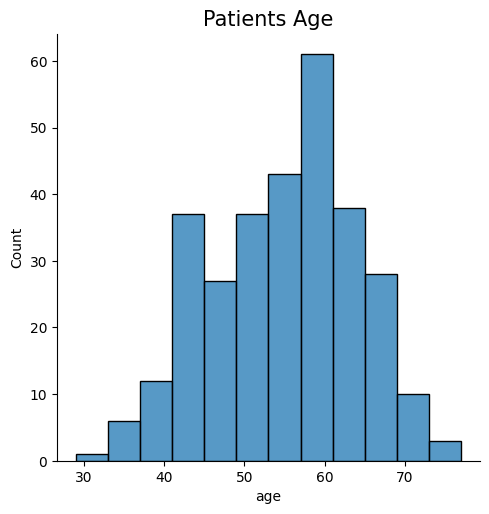

In [260]:
sns.displot(df["age"])
plt.title("Patients Age",fontsize=15)
plt.show()

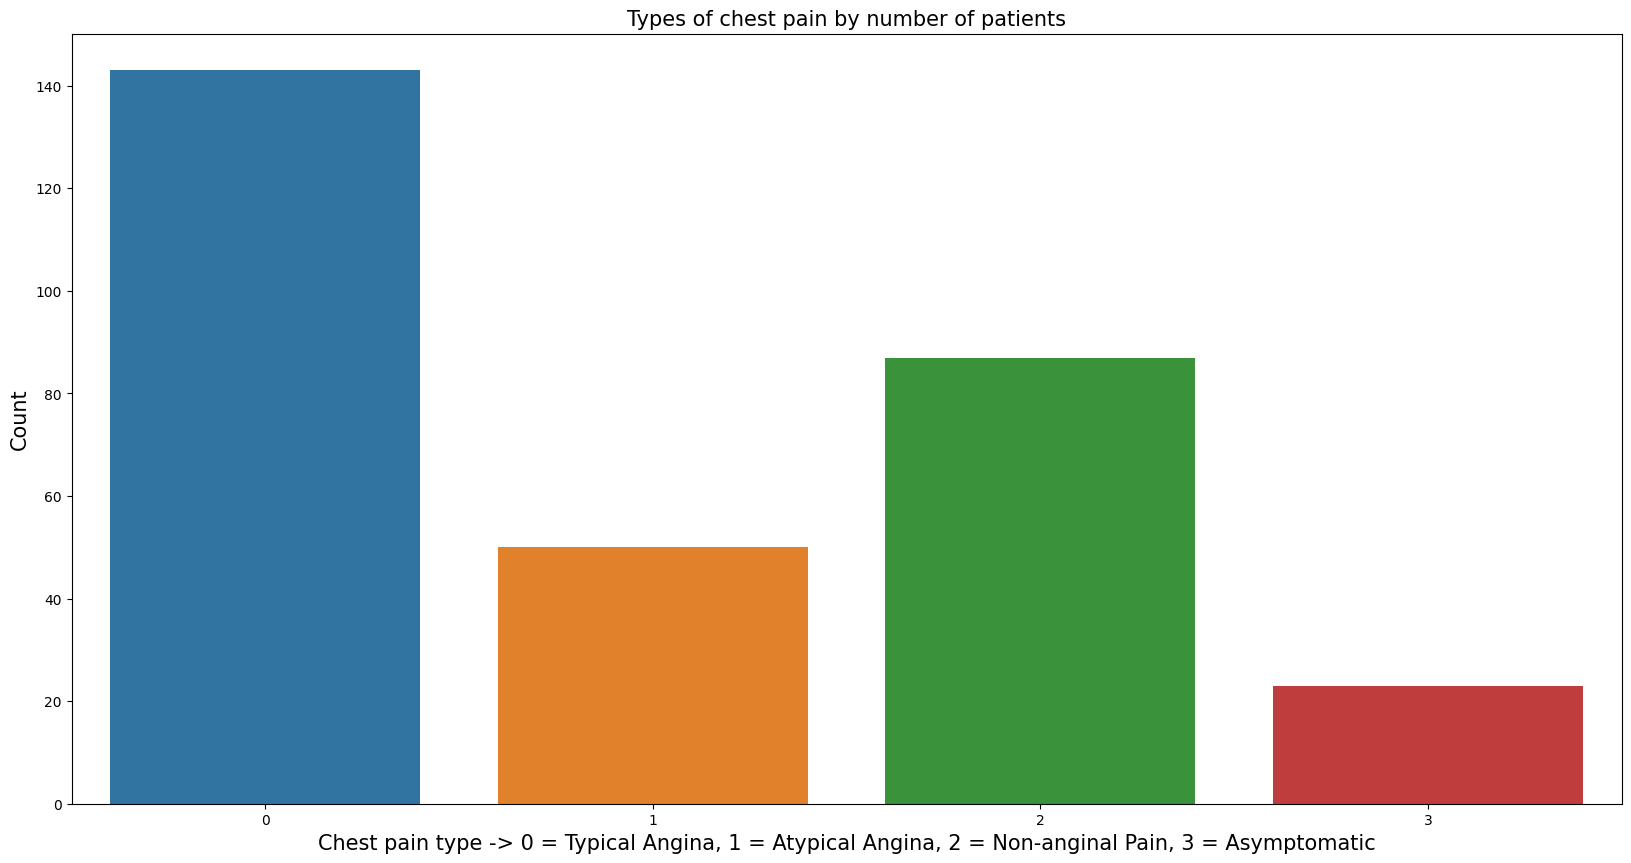

In [261]:
c=df["cp"].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x=c["cp"],y=c["count"])
plt.title("Types of chest pain by number of patients",fontsize=15)
plt.xlabel("Chest pain type -> 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

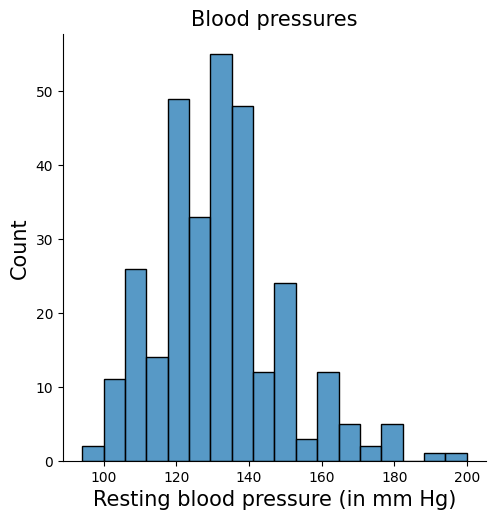

In [262]:
sns.displot(df["trtbps"])
plt.title("Blood pressures",fontsize=15)
plt.xlabel("Resting blood pressure (in mm Hg)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

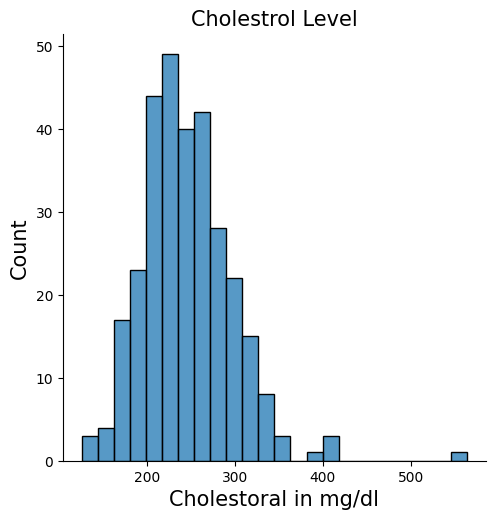

In [264]:
sns.displot(df["chol"])
plt.title("Cholestrol Level",fontsize=15)
plt.xlabel("Cholestoral in mg/dl",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

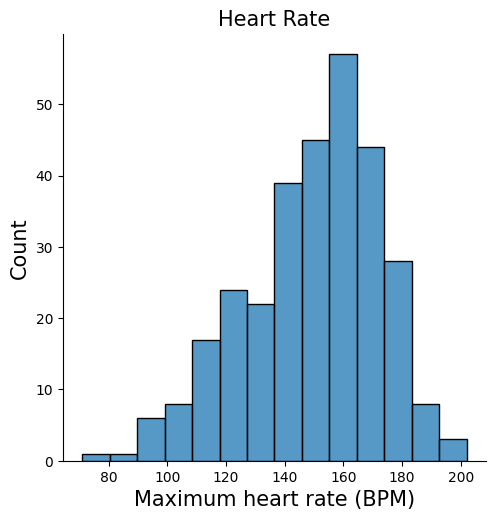

In [265]:
sns.displot(df["thalachh"])
plt.title("Heart Rate",fontsize=15)
plt.xlabel("Maximum heart rate (BPM)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

INSIGHT:

Maximum ages = 58
Maximum Chest Pains = Typical angina
Maximum resting blood pressures = 135 (in mm Hg)
Maximum Choletrol levels = between 210 to 250 (in mg/dl)
Maximum heart rates = 160 (BPM)

Bi-Variate Analysis

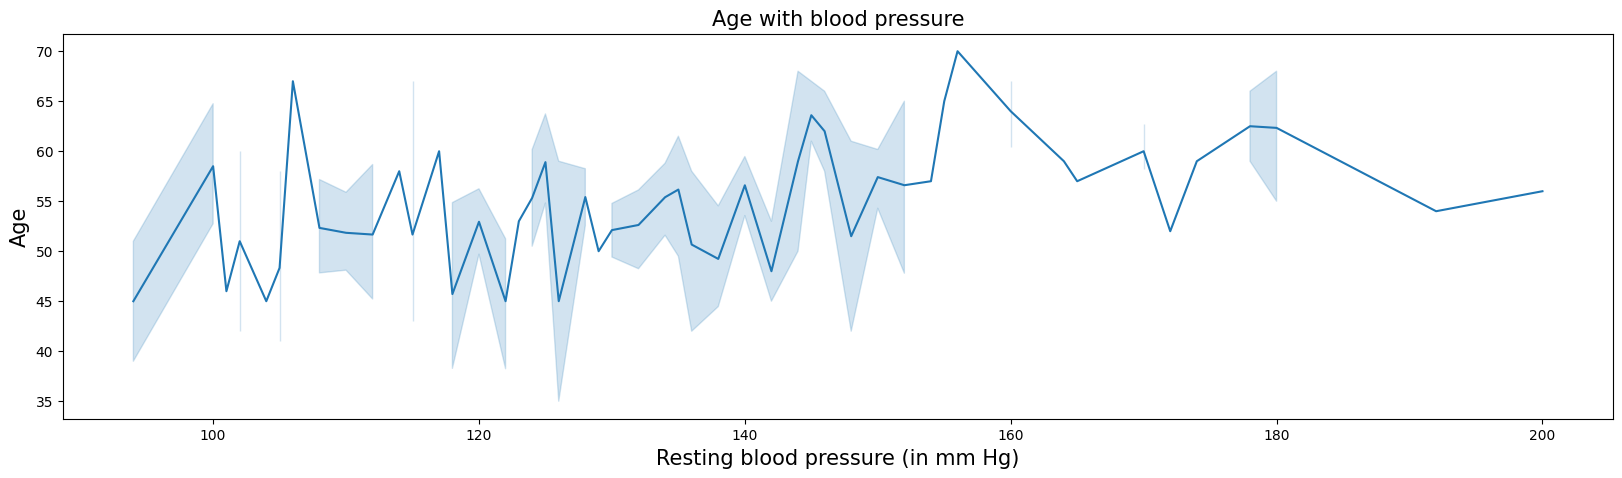

In [266]:
plt.figure(figsize=(20,5))
sns.lineplot(x="trtbps",y="age",data=df)
plt.title("Age with blood pressure",fontsize=15)
plt.ylabel("Age",fontsize=15)
plt.xlabel("Resting blood pressure (in mm Hg)",fontsize=15)
plt.show()

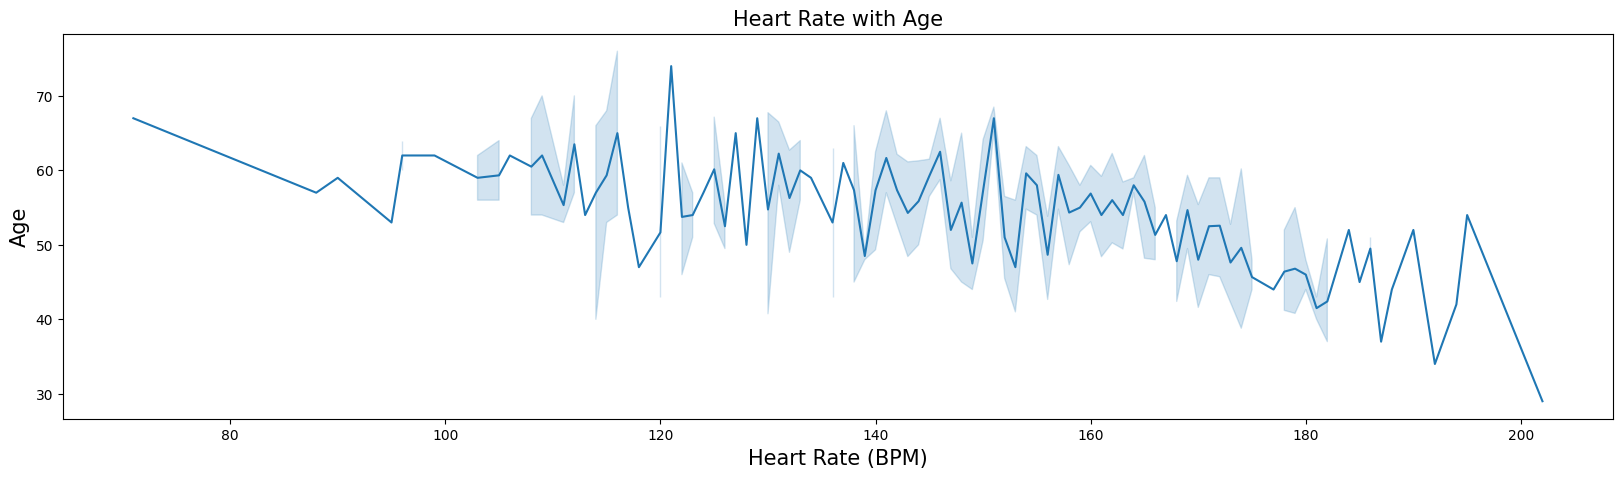

In [267]:
plt.figure(figsize=(20,5))
sns.lineplot(x="thalachh",y="age",data=df)
plt.title("Heart Rate with Age",fontsize=15)
plt.ylabel("Age",fontsize=15)
plt.xlabel("Heart Rate (BPM)",fontsize=15)
plt.show()

INSIGHT :

As age advances, there's a greater possibility of blood pressure and heart rate increasing within the body

Multi-Variate Analysis

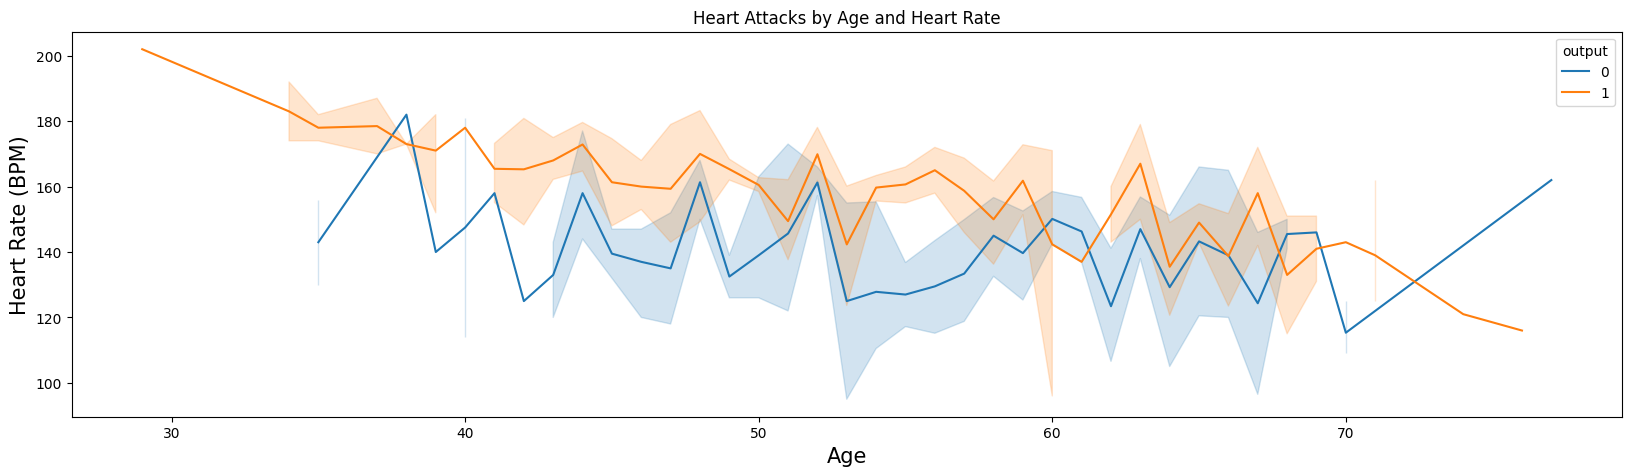

In [268]:
plt.figure(figsize=(20,5))
sns.lineplot(x="age",y="thalachh",hue="output",data=df)
plt.title("Heart Attacks by Age and Heart Rate")
plt.xlabel("Age",fontsize=15)
plt.ylabel("Heart Rate (BPM)",fontsize=15)
plt.show()

<Axes: >

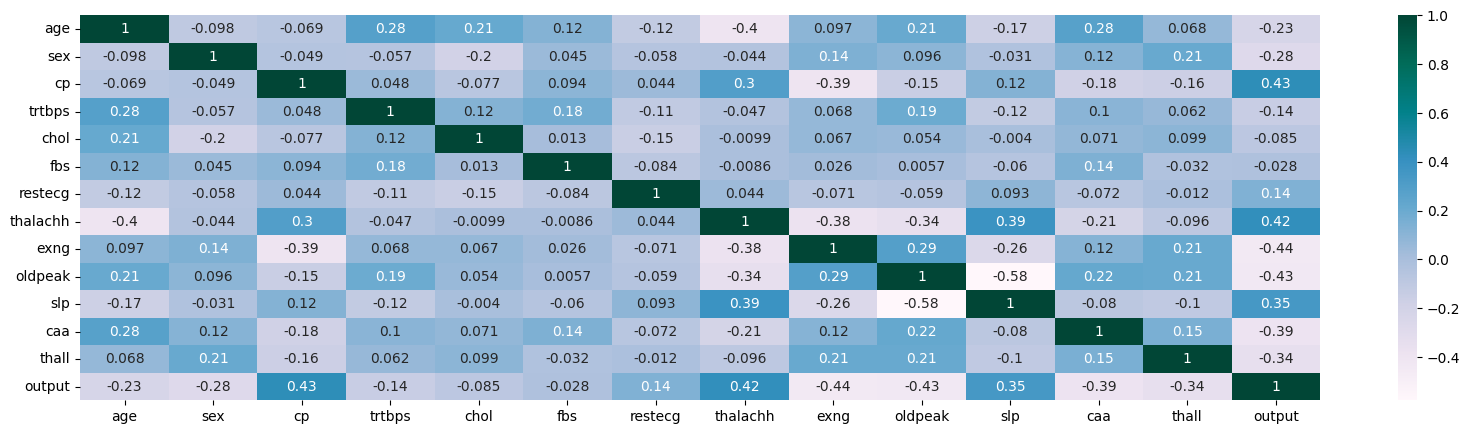

In [269]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

INSIGHT :

People with a high heart rate are at a greater risk of having a heart attack

In [270]:
# Separate features and target variable
X = df.drop("output", axis=1)
y = df["output"]

In [271]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [394]:
# Define preprocessing steps
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=[object]).columns.tolist()
print(numeric_features)
print(categorical_features)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
[]


In [396]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [420]:
from imblearn.over_sampling import SMOTE
# Resample using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [441]:
# Create the classifier (replace 'Classifier' with the desired algorithm)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [428]:
# Create the pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])

In [429]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'cp', 'trtbps',
                                                   'chol', 'fbs', 'restecg',
                                                   'thalachh', 'exng',
                                                   'oldpeak', 'slp', 'caa',
                                                   'thall']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', KNeighborsClassifier())])

In [430]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [431]:
# Calculate classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [432]:
# Get probabilities for ROC curve and AUC
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

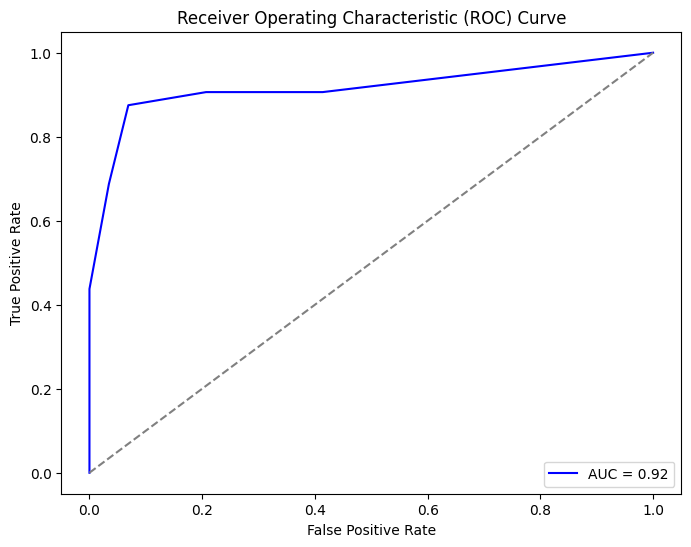

In [433]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="b", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [434]:
# Print the classification metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[27  2]
 [ 4 28]]
Accuracy: 0.9016393442622951
Precision: 0.9333333333333333
Recall: 0.875
F1 Score: 0.9032258064516129
ROC AUC: 0.9154094827586208


In [435]:
import pickle
filename = 'Class_heart.sav'
pickle.dump(pipeline, open(filename, 'wb'))

In [436]:
filename = 'Class_heart.sav'
model = pickle.load(open(filename, 'rb'))

In [437]:
data = pd.read_excel('new_data_heart.xlsx')

In [438]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,48,1,1,110,229,0,1,168,0,1,0,0,3,0


In [439]:
data.iloc[:,0:-1]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,48,1,1,110,229,0,1,168,0,1,0,0,3


In [440]:
class_names = ['no heart attack', 'heart attack']
output = model.predict(data.iloc[:,0:-1])
result = class_names[output[0]]
result

'no heart attack'